In [1]:
!pip install opencv-python-headless
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow

    extract-msg (<=0.29.*)
                 ~~~~~~~^


    extract-msg (<=0.29.*)
                 ~~~~~~~^


    extract-msg (<=0.29.*)
                 ~~~~~~~^


    extract-msg (<=0.29.*)
                 ~~~~~~~^


    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [6]:
batch_size = 100
img_height = 250
img_width = 250

In [7]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\MANOJ\\Desktop\\Python\\data\\train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\MANOJ\\Desktop\\Python\\data\\test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\MANOJ\\Desktop\\Python\\data\\val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [8]:
class_names = training_ds.class_names

AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

C:\Users\MANOJ\AppData\Local\Temp\ipykernel_137512\451698701.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,


In [23]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 20)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.4808 - loss: 0.8496 - val_accuracy: 0.5000 - val_loss: 0.7134
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.5336 - loss: 0.6879 - val_accuracy: 0.7143 - val_loss: 0.5864
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.6962 - loss: 0.5763 - val_accuracy: 0.7857 - val_loss: 0.5178
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.8021 - loss: 0.4551 - val_accuracy: 0.8265 - val_loss: 0.4021
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.8475 - loss: 0.3243 - val_accuracy: 0.7857 - val_loss: 0.4216
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9157 - loss: 0.2390 - val_accuracy: 0.9082 - val_loss: 0.2586
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9616 - loss: 0.1280 - val_accuracy: 0.9184 - val_loss: 0.2139
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9754 - loss: 0.0908 - val_accuracy: 0.8571 - val_loss: 0.2808
Epoch 9

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 6, 6, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,642,597 (13.90 MB)

 Trainable params: 461,537 (1.76 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 923,076 (3.52 MB)

In [11]:
model.save('accident_detection_model1.h5')
print("Model saved successfully!")


Model saved successfully!


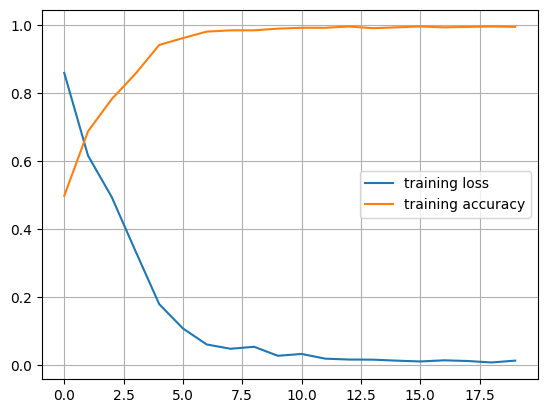

In [13]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


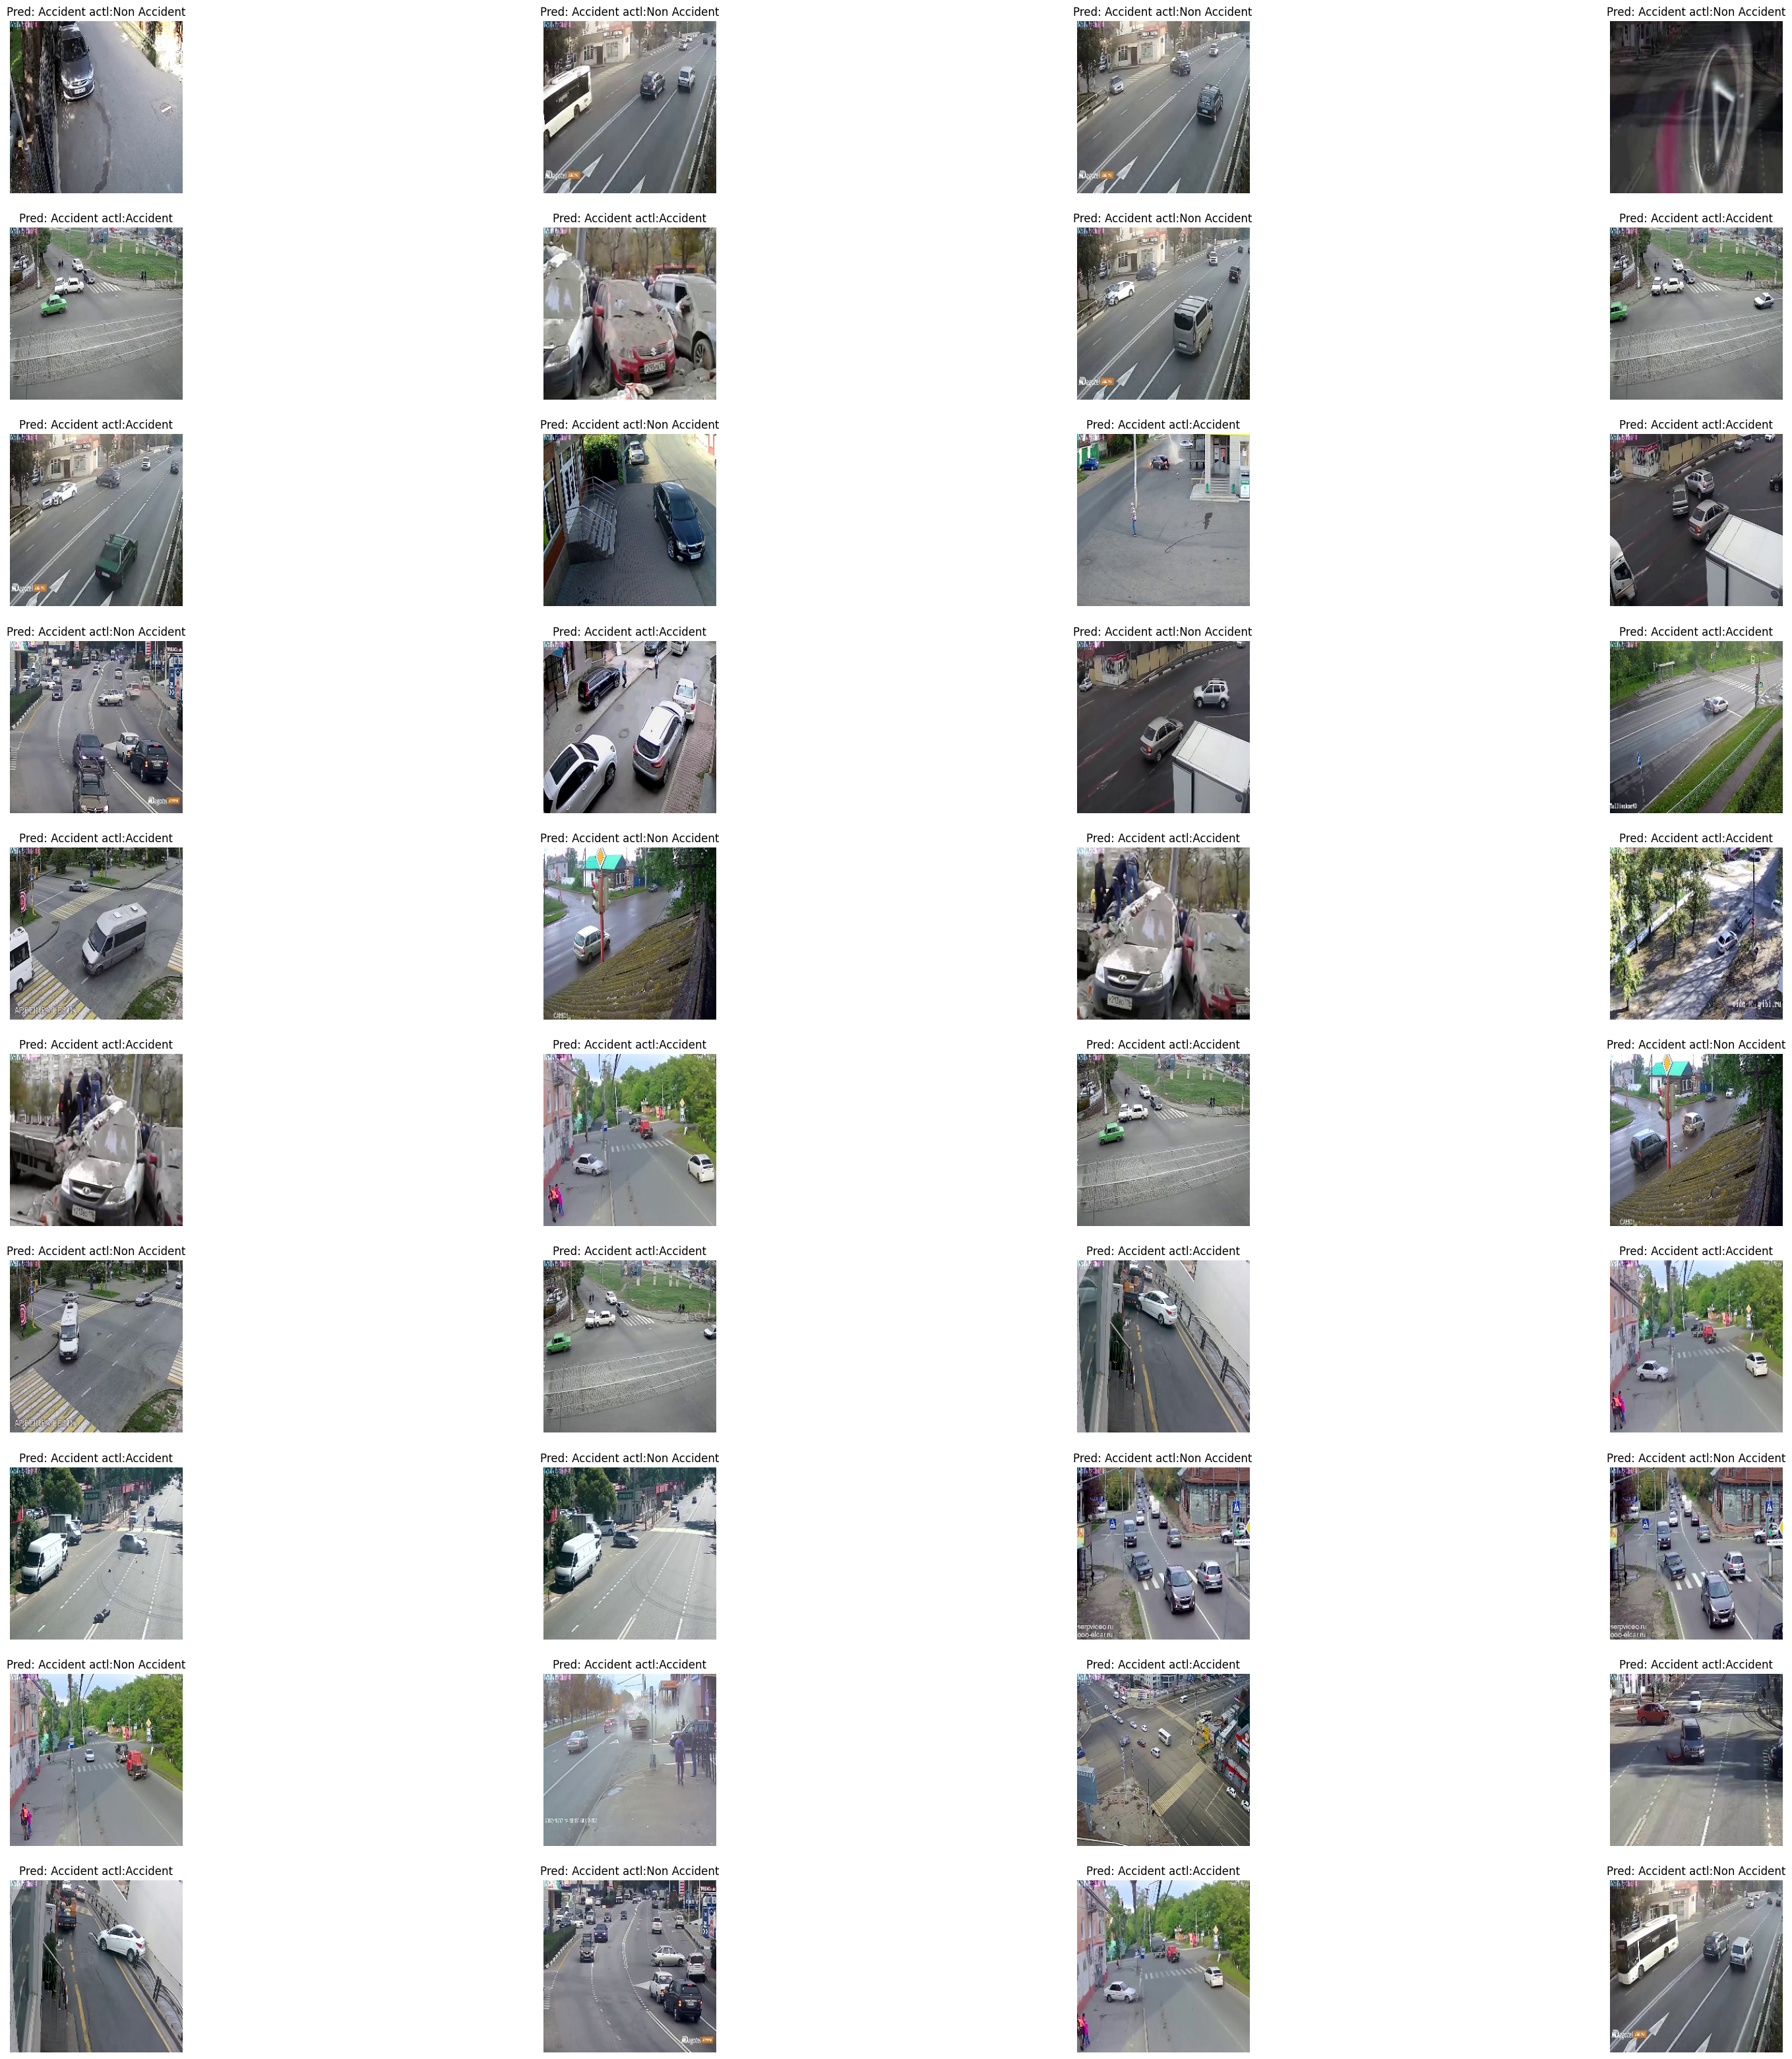

In [15]:
AccuracyVector = []
plt.figure(figsize=(40, 40))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [16]:
truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
for i in range(0,100):
    if(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Accident'):
        truePositive+=1
    elif(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Non Accident'):
        trueNegative+=1
    elif(predlabel[i]=='Non Accident' and class_names[labels[i]]=='Accident'):
        falseNegative+=1
    else:
        falsePositive+=1

In [17]:
print(f'True positives are: {truePositive}')
print(f'True negatives are: {trueNegative}')
print(f'False negatives are: {falseNegative}')
print(f'False positives are: {falsePositive}')

True positives are: 47
True negatives are: 0
False negatives are: 0
False positives are: 53


In [21]:
print(class_names)

['Accident', 'Non Accident']


In [20]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [21]:
import cv2
image=[]
label=[]

c=1
cap= cv2.VideoCapture('C:\\Users\\MANOJ\\Desktop\\Python\\test\\videoplayback (online-video-cutter.com).mp4')
while True:
    grabbed, frame = cap.read()
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==75):
            break
    c+=1

cap.release()

30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
210
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
240
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
270
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
330
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
390
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
420
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
480
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
510
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
540
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
570
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
630
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
660
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
720
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63m

Accident Detected
AxesImage(size=(360, 640))


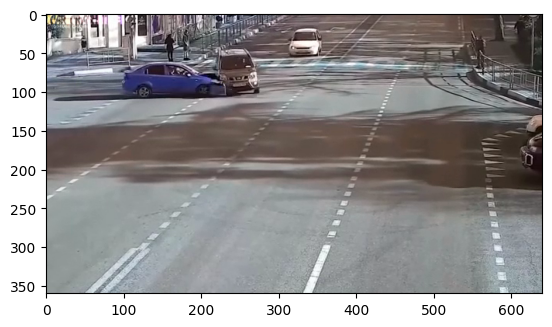

In [29]:
print(label[1])
print(plt.imshow(image[1]))